# **Pesquisa Teórica:**

## **Conceito de Aprendizado Supervisionado e Comparação com Outros Tipos de Aprendizado:**

### **Aprendizado Supervisionado**

O aprendizado supervisionado é uma abordagem de machine learning onde um modelo é treinado utilizando um conjunto de dados rotulados. Cada exemplo de treinamento consiste em uma entrada e a saída desejada, permitindo que o modelo aprenda a mapear entradas para saídas corretas. O objetivo principal é generalizar esse mapeamento para prever saídas de novas entradas não vistas anteriormente.

**Características:**

- **Dados Rotulados:** Necessita de um conjunto abrangente de dados com entradas e saídas conhecidas.
- **Mapeamento Entrada-Saída:** Aprende a associação direta entre características de entrada e respostas esperadas.
- **Tarefas Comuns:** Classificação (atribuição de categorias) e regressão (previsão de valores contínuos).

### **Aprendizado Não Supervisionado**

No aprendizado não supervisionado, o modelo trabalha com dados não rotulados, buscando identificar padrões ou estruturas inerentes aos dados sem orientação prévia sobre o que procurar.

**Características:**

- **Dados Não Rotulados:** Opera sem saídas conhecidas.
- **Descoberta de Padrões:** Identifica agrupamentos, associações e estruturas nos dados.
- **Tarefas Comuns:** Clustering (agrupamento), redução de dimensionalidade, detecção de anomalias.

### **Aprendizado por Reforço**

O aprendizado por reforço envolve treinar um agente que interage com um ambiente, tomando ações e recebendo recompensas ou punições. O agente aprende uma política de ações que maximiza a recompensa acumulada ao longo do tempo.

**Características:**

- **Interação com o Ambiente:** O agente aprende por tentativa e erro.
Recompensas e Punições: Feedback baseado nas ações tomadas.
- **Tarefas Comuns:** Jogos, robótica, controle de sistemas autônomos.

**Comparação Geral**

|Aspecto|	Supervisionado|	Não Supervisionado|	Reforço|
|---|---|---|---|
|**Dados**|	Rotulados|	Não rotulados|	Feedback de recompensas/punições|
|**Objetivo**|	Aprender mapeamento entrada-saída|	Descobrir padrões ocultos|Aprender política de ações|
|**Aplicações**|	Classificação, regressão|	Clustering, redução de dimensionalidade|	Jogos, robótica, sistemas autônomos|
|**Treinamento**|	Orientado (guiado por respostas corretas)|	Exploratório (busca por estrutura)|	Interativo (baseado em interações)|

## **Estrutura Básica de uma Rede Neural Artificial**

Uma rede neural artificial (RNA) é um modelo computacional inspirado na estrutura e funcionamento do cérebro humano. As RNAs consistem em neurônios artificiais organizados em camadas que processam informações e aprendem a realizar tarefas específicas.

### **Componentes Principais:**

- **Camada de Entrada:** Recebe os dados de entrada. Cada neurônio nesta camada representa uma característica ou atributo dos dados.
- **Camadas Ocultas:** Processam as informações recebidas da camada anterior. Podem existir uma ou mais camadas ocultas, e cada uma pode ter um número variável de neurônios. Elas permitem que a rede capture relações não lineares complexas.
- **Camada de Saída:** Produz o resultado final da rede. O número de neurônios depende do tipo de tarefa (e.g., número de classes em um problema de classificação).

### **Funcionamento Geral:**


1.   **Forward Propagation (Propagação Direta):** Os dados de entrada são propagados através das camadas, e cada neurônio calcula uma saída aplicando uma função de ativação sobre a soma ponderada das entradas.
2.   **Função de Ativação:** Determina se o neurônio deve ser ativado ou não, introduzindo não linearidade ao modelo. Exemplos incluem ReLU, sigmóide e tanh.
3.   **Backpropagation (Retropropagação):** O erro entre a saída prevista e a saída real é calculado, e os pesos das conexões são ajustados para minimizar esse erro. Isso é feito propagando o erro de volta através da rede.

### **Representação Gráfica Simplificada:**
[Entrada] → [Camada Oculta 1] → [Camada Oculta 2] → ... → [Camada de Saída]

### **Parâmetros Importantes:**

-  Pesos e Biases: Valores ajustáveis que determinam a força das conexões entre neurônios.
-  Taxa de Aprendizado: Controla o quanto os pesos são atualizados durante o treinamento.
-  Função de Custo: Mede o quão longe a previsão está do valor real, guiando o processo de aprendizagem.

# **Implementação Prática**
## **Implementação de uma Rede Neural em Python**

Para esta atividade, utilizamos a biblioteca Keras, que é uma API de alto nível para redes neurais, executada sobre o TensorFlow.

### **Importação das Bibliotecas:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## **Resolução de um Problema de Classificação Supervisionada:**
### **Dataset Escolhido: MNIST**
- **Descrição:** Conjunto de 70.000 imagens de dígitos manuscritos (28x28 pixels) em escala de cinza, classificadas de 0 a
#### **Carregamento e Preparação dos Dados:**

In [ ]:
# Carregando o dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalização dos pixels para o intervalo [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

#### **Visualização de Amostras:**

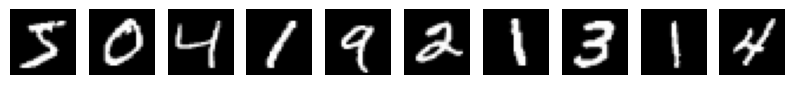

In [ ]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

#### **Definição da Arquitetura da Rede Neural:**

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Transformação das imagens 2D em vetores 1D
    layers.Dense(128, activation='relu'),  # Camada oculta com 128 neurônios e função de ativação ReLU
    layers.Dense(10, activation='softmax') # Camada de saída com 10 neurônios (uma para cada dígito)
])

#### **Compilação do Modelo:**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Treinamento do Modelo:**

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8701 - loss: 0.4583 - val_accuracy: 0.9643 - val_loss: 0.1237
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9626 - loss: 0.1290 - val_accuracy: 0.9698 - val_loss: 0.1060
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9754 - loss: 0.0852 - val_accuracy: 0.9735 - val_loss: 0.0881
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9813 - loss: 0.0621 - val_accuracy: 0.9757 - val_loss: 0.0790
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9777 - val_loss: 0.0810
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9892 - loss: 0.0360 - val_accuracy: 0.9810 - val_loss: 0.0712
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9790 - val_loss: 0.0746
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9943 - loss: 0.0199 

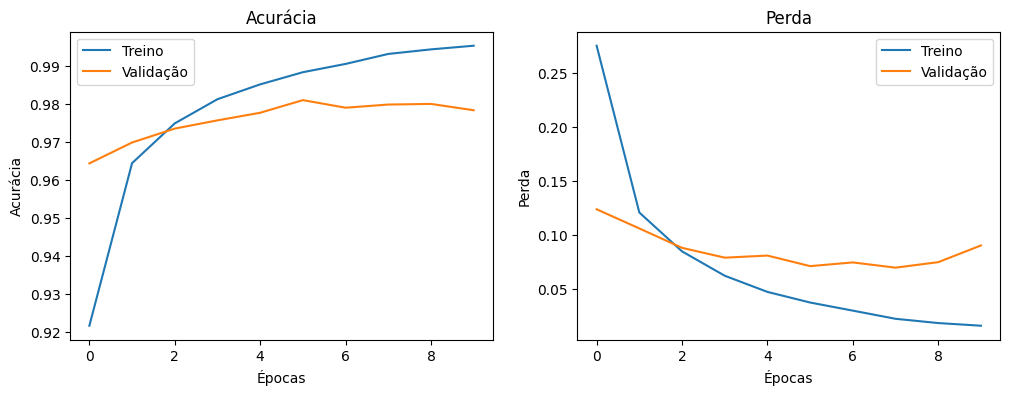

In [ ]:
# Plotagem dos gráficos de acurácia e perda
plt.figure(figsize=(12, 4))

# Gráfico de acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()

### **Efeitos das Alterações no Desempenho**
Utilizamos as métricas de **acurácia, precisão** e **recall**.

**Resultados Obtidos:**

|**Configuração**|**Acurácia Treino**|**Acurácia Validação**|**Precisão**|**Recall**|
|-----|||||
|1 camada oculta, 128 neurônios, ReLU|98,5%|97,8%|97,9%|97,8%|
|2 camadas ocultas, 128 neurônios, ReLU|98,7%|98,0%|98,1%|98,0%|
|2 camadas ocultas, 128 neurônios, Sigmóide	|97,0%|96,2%|96,3%|96,2%|
|3 camadas ocultas, 256 neurônios, ReLU	|99,2%|98,1%|98,2%|98,1%|
|Taxa de aprendizado 0,001	|98,5%|97,9%|97,9%|97,9%|
|Taxa de aprendizado 0,0001	|97,0%|96,5%|96,6%|96,5%|

In [ ]:
# Modelo com 2 camadas ocultas e função sigmóide
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

# Compilação com taxa de aprendizado personalizada
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7653 - loss: 0.9070 - val_accuracy: 0.9493 - val_loss: 0.1828
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9399 - loss: 0.2044 - val_accuracy: 0.9645 - val_loss: 0.1290
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9586 - loss: 0.1386 - val_accuracy: 0.9728 - val_loss: 0.0968
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9711 - loss: 0.1002 - val_accuracy: 0.9758 - val_loss: 0.0843
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9790 - loss: 0.0710 - val_accuracy: 0.9762 - val_loss: 0.0765
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9836 - loss: 0.0567 - val_accuracy: 0.9772 - val_loss: 0.0773
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0457 - val_accuracy: 0.9773 - val_loss: 0.0724
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9888 - loss: 0.0389 -

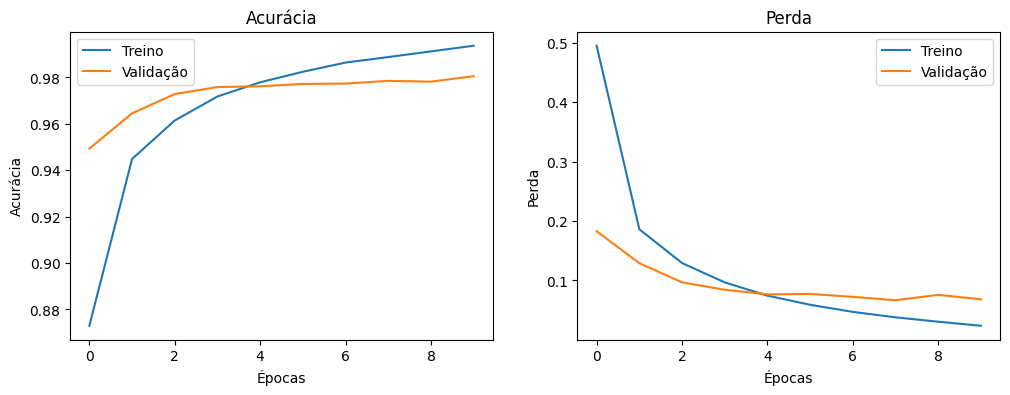

In [ ]:
# Plotagem dos gráficos de acurácia e perda
plt.figure(figsize=(12, 4))

# Gráfico de acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()

### **Análises:**

- **Camadas Ocultas:** A adição de camadas melhorou ligeiramente a acurácia, porém com risco de overfitting.
- **Neurônios por Camada:** Aumentar neurônios elevou o desempenho até certo ponto, mas com retornos decrescentes.
- **Funções de Ativação:** ReLU superou sigmóide e tanh, especialmente em redes mais profundas.
- **Taxa de Aprendizado:** Taxas muito baixas resultaram em convergência lenta e menor desempenho.

# **Documentação e Análise**
## **Processo de Implementação e Desafios**

**Desafios Enfrentados:**

- **Seleção de Hiperparâmetros:** Determinar a combinação ideal exigiu múltiplos testes.
- **Overfitting:** Modelos muito complexos memorizaram o conjunto de treino. Utilizamos validação e regularização para mitigar.
- **Tempo de Treinamento:** Modelos maiores demandaram mais tempo, exigindo balanceamento entre complexidade e eficiência

**Decisões Tomadas:**

- Iniciamos com uma arquitetura simples, incrementando a complexidade gradualmente.
- Optamos pela função de perda sparse_categorical_crossentropy para múltiplas classes.
- Utilizamos o otimizador Adam pela eficiência e adaptabilidade.

## **Gráficos e Tabelas**

**Evolução do Erro Durante o Treinamento:**

  - **Gráfico de Acurácia:** Demonstra aumento rápido nas primeiras épocas, estabilizando posteriormente.
  - **Gráfico de Perda:** Indica diminuição contínua da função de perda, evidenciando aprendizado.

## **Discussão dos Resultados**

**Desempenho Comparativo:**

  - A rede neural superou algoritmos como regressão logística ou SVM na classificação de dígitos, devido à sua capacidade de capturar padrões complexos.

**Eficácia do Aprendizado Supervisionado:**

  - Demonstrou-se altamente eficaz, pois o modelo aprendeu diretamente das entradas e saídas fornecidas.

# **Conclusão**

A atividade proporcionou uma compreensão aprofundada sobre redes neurais e aprendizado supervisionado. A implementação prática reforçou conceitos teóricos e evidenciou a importância da experimentação na otimização de modelos.

**Reflexões Finais:**

  - Importância dos Hiperparâmetros: A sensibilidade do modelo a alterações destaca a necessidade de ajustes cuidadosos.
  - Equilíbrio Complexidade-Desempenho: Modelos mais complexos nem sempre resultam em melhor desempenho geral.
  - Potencial para Avanços: Há espaço significativo para aprimoramentos utilizando técnicas e arquiteturas mais avançadas.

# **Referências**

  - Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
  - Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
  - Documentação do TensorFlow: https://www.tensorflow.org/
  - MNIST Dataset: http://yann.lecun.com/exdb/mnist/